In [1]:
# A mockup of our linar regression machine learning model: comparing and predicting happiness and GDP
# references 
# https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
# https://www.youtube.com/watch?v=E5RjzSK0fvY
# https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=10s

In [2]:
# future changes:
# 1. insert correct files names
# 2. insert colors
#3. insert labels

In [3]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for regression
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [4]:
# read the data into a df

data= pd.read_csv("Final Resources/joined_final_tables.csv")

# idk what these are, might need it later though 
#dtf = dtf[["Id"]+cols+["SalePrice"]]

print(data.shape)
data.head()

(140, 6)


,countries,gdp_per_captia,happiness,life_expectancy_men,life_expectancy_women,suicide_rate
0,Afghanistan,"1,105",3.794,60.6,68.2,3.794
1,Albania,"4,932",4.959,74.8,81.3,4.959
2,Algeria,"4,534",5.605,73.3,78.9,5.605
3,Andorra,"46,622",6.955,81.7,84.8,6.955
4,Angola,"2,077",4.105,58.1,65.6,4.105


In [5]:
# collect x and y
X = data['Happiness Score'].values
Y = data['Life Expectancy (years) - Women'].values

KeyError: 'Happiness Score'

In [6]:
# mean for graphing

mean_x = np.mean(X)
mean_y = np.mean(Y)

# totals

m = len(X)

# using this guy's formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom  += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#hopefully that works, print dat
print(b1, b0)

NameError: name 'X' is not defined

In [7]:
#plot values and regression line?
max_x = np.max(X) + 2
min_x = np.min(X) - 0

#calculate line values x and y
x = np.linspace(min_x, max_x, 1000) #why 1000?
y = b0 + b1 * x

# plot line, the best part
plt.plot(x, y, color= '#58b970', label = 'Regression Line')

#plot scatterplot
plt.scatter(X, Y, c='#ef5423', label = 'Persons')

#extras
plt.xlabel('Happiness of persons')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

NameError: name 'X' is not defined

In [8]:
#test it, we can change it later but i'm going r2
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

NameError: name 'm' is not defined

In [9]:
#sklearn stuff, double check
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#no rank 1 (????)
X = X.reshape((m, 1))
#create the model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)

#calculate r2
r2_score = reg.score(X, Y)
print(r2_score)

NameError: name 'X' is not defined

In [10]:
X1 = data.life_expectancy_men.values.reshape(-1, 1)

In [11]:
X1[:5]

array([[60.6],
       [74.8],
       [73.3],
       [81.7],
       [58.1]])

In [12]:
X1.shape

(140, 1)

In [13]:
y1 = data.happiness

In [14]:
model = LinearRegression()

In [15]:
model.fit(X1,y1)

LinearRegression()

In [16]:
y1_pred = model.predict(X1)

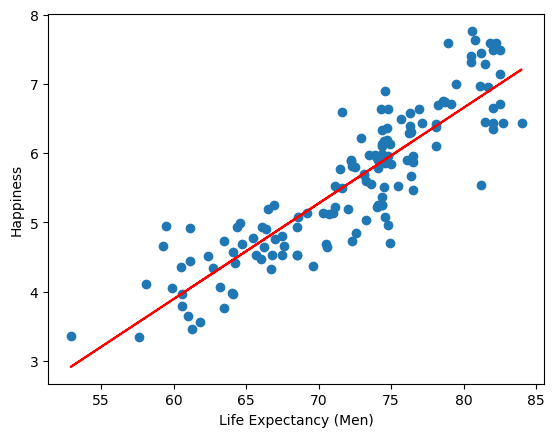

In [17]:
plt.scatter(X1, y1)
plt.xlabel('Life Expectancy (Men)')
plt.ylabel('Happiness')
plt.plot(X1, y1_pred, color='red')
plt.show()

In [18]:
X2 = data.life_expectancy_women.values.reshape(-1, 1)

In [19]:
X2[:5]

array([[68.2],
       [81.3],
       [78.9],
       [84.8],
       [65.6]])

In [20]:
X2.shape

(140, 1)

In [21]:
y2 = data.happiness

In [22]:
model = LinearRegression()

In [23]:
model.fit(X2,y2)

LinearRegression()

In [24]:
y2_pred = model.predict(X2)

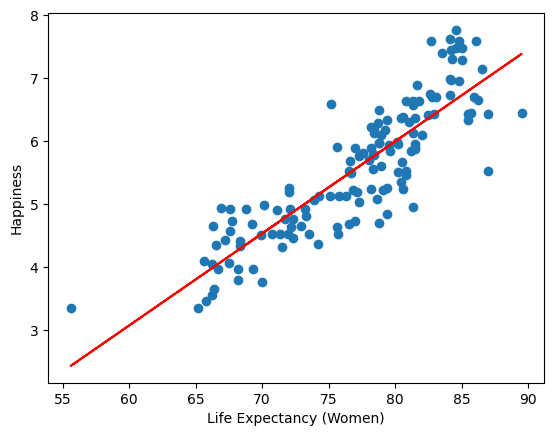

In [25]:
plt.scatter(X2, y2)
plt.xlabel('Life Expectancy (Women)')
plt.ylabel('Happiness')
plt.plot(X2, y2_pred, color='red')
plt.show()

In [50]:
X3 = data.life_expectancy_men.values.reshape(-1, 1)

In [51]:
X3[:5]

array([[60.6],
       [74.8],
       [73.3],
       [81.7],
       [58.1]])

In [52]:
X3.shape

(140, 1)

In [53]:
y3 = data.suicide_rate

In [54]:
model = LinearRegression()

In [55]:
model.fit(X3,y3)

LinearRegression()

In [56]:
y3_pred = model.predict(X3)

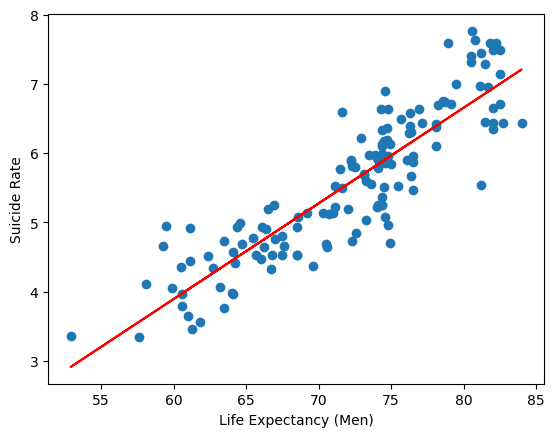

In [57]:
plt.scatter(X3, y3)
plt.xlabel('Life Expectancy (Men)')
plt.ylabel('Suicide Rate')
plt.plot(X3, y3_pred, color='red')
plt.show()

In [71]:
X4 = data.life_expectancy_women.values.reshape(-1, 1)

In [72]:
X4[:5]

array([[68.2],
       [81.3],
       [78.9],
       [84.8],
       [65.6]])

In [73]:
y4 = data.suicide_rate

In [74]:
model = LinearRegression()

In [75]:
model.fit(X4,y4)

LinearRegression()

In [76]:
y4_pred = model.predict(X4)

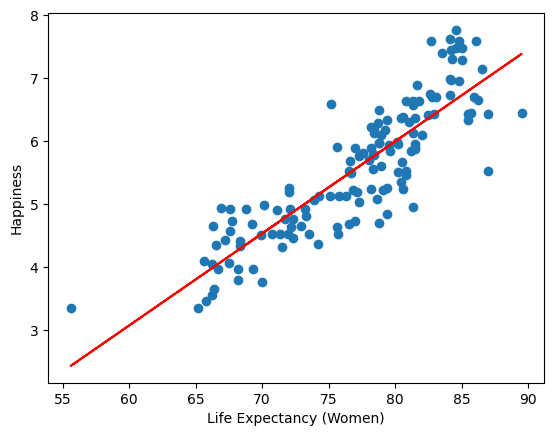

In [77]:
plt.scatter(X4, y4)
plt.xlabel('Life Expectancy (Women)')
plt.ylabel('Happiness')
plt.plot(X4, y4_pred, color='red')
plt.show()